Eric Holmes

Kevin Calloway

Ryan Hossa

Zhong Zhong

## Motivation

Our goal with this project is to predict the popularity of a Mashable news article using the metric of article shares. Our data set is the Online News Popularity Data Set (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity), which consists of 61 attributes collected for 39797 articles. 

Using these atributes, we aim to apply machine learning techniques like regression to predict the number of shares a new article may get or classification models to place new articles into categories such as 'popular' or 'unpopular'.

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
#read in data and strip whitespace from column names
infile = 'OnlineNewsPopularity/OnlineNewsPopularity.csv'
data = pd.read_csv(infile)
df = pd.DataFrame(data)
df = df.rename(str.strip, axis = 'columns')

In [ ]:
#Drop url and separate target variable
df = df.drop('url', axis=1)
df = df.drop('timedelta', axis=1)
X = df.drop('shares', axis=1)
y = df['shares']

In [ ]:
X.head()

In [ ]:
#Shares histogram
plt.hist(y)
plt.show()

In [ ]:
u_10_count = 0
u_10_shares = []
for i in y:
    if i < 1400:
        u_10_count += 1
        u_10_shares.append(i)

#Histogram of shares (Under 1400)
plt.hist(u_10_shares, bins = 20)
plt.show()

In [ ]:
#Correlation
X.corr().style.background_gradient(cmap='coolwarm', axis=None)

In [ ]:
#Import PCA
from sklearn.decomposition import PCA

In [ ]:
#PCA to investigate variable groups
pca = PCA(n_components=5)
pca.fit(X)
pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_ratio_), index=X.columns)

In [ ]:
#kw and self_reference account for most of the variance
pca.explained_variance_ratio_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split data for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
#split data for classification
#Over 1400 is labeled popular
#0 = unpopular, 1 = popular
y_popular = (y > 1400)*1
pop_X_train, pop_X_test, pop_y_train, pop_y_test = train_test_split(X, y_popular, test_size=0.30)

In [ ]:
#Split data into attribute groups
count = 0

for df in [X_train, X_test]:
    if count == 0:
        token_df_train = df.iloc[:, 1:12]
        data_channel_df_train = df.iloc[:, 12:18]
        kw_df_train = df.iloc[:, 18:27]
        self_reference_df_train = df.iloc[:, 27:30]
        week_df_train = df.iloc[:, 30:38]
        LDA_df_train = df.iloc[:, 38:43]
        nlp_df_train = df.iloc[:, 43:59]
        count += 1
    else:
        token_df_test = df.iloc[:, 1:12]
        data_channel_df_test = df.iloc[:, 12:18]
        kw_df_test = df.iloc[:, 18:27]
        self_reference_df_test = df.iloc[:, 27:30]
        week_df_test = df.iloc[:, 30:38]
        LDA_df_test = df.iloc[:, 38:43]
        nlp_df_test = df.iloc[:, 43:59]    

In [ ]:
#Split classfication data into attribute groups
count = 0

for df in [pop_X_train, pop_X_test]:
    if count == 0:
        pop_token_df_train = df.iloc[:, 1:12]
        pop_data_channel_df_train = df.iloc[:, 12:18]
        pop_kw_df_train = df.iloc[:, 18:27]
        pop_self_reference_df_train = df.iloc[:, 27:30]
        pop_week_df_train = df.iloc[:, 30:38]
        pop_LDA_df_train = df.iloc[:, 38:43]
        pop_nlp_df_train = df.iloc[:, 43:59]
        count += 1
    else:
        pop_token_df_test = df.iloc[:, 1:12]
        pop_data_channel_df_test = df.iloc[:, 12:18]
        pop_kw_df_test = df.iloc[:, 18:27]
        pop_self_reference_df_test = df.iloc[:, 27:30]
        pop_week_df_test = df.iloc[:, 30:38]
        pop_LDA_df_test = df.iloc[:, 38:43]
        pop_nlp_df_test = df.iloc[:, 43:59]    

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Regression using attribute categories
lr1 = LinearRegression()
lr1.fit(token_df_train, y_train)
pred = lr1.predict(token_df_train)

print('R2: ' + str(lr1.score(token_df_test, y_test)))

count = 0
for i in token_df_train.columns:
    print(i + ': ' + str(lr1.coef_[count]))
    count += 1

In [ ]:
train = data_channel_df_train
test = data_channel_df_test
lr2 = LinearRegression()
lr2.fit(train, y_train)

print('R2: ' + str(lr2.score(test, y_test)))

count = 0
for i in train.columns:
    print(i + ': ' + str(lr2.coef_[count]))
    count += 1

In [ ]:
train = kw_df_train
test = kw_df_test
lr3 = LinearRegression()
lr3.fit(train, y_train)

print('R2: ' + str(lr3.score(test, y_test)))

count = 0
for i in train.columns:
    print(i + ': ' + str(lr3.coef_[count]))
    count += 1

In [ ]:
train = self_reference_df_train
test = self_reference_df_test
lr4 = LinearRegression()
lr4.fit(train, y_train)

print('R2: ' + str(lr4.score(test, y_test)))

count = 0
for i in train.columns:
    print(i + ': ' + str(lr4.coef_[count]))
    count += 1

In [ ]:
train = week_df_train
test = week_df_test
lr5 = LinearRegression()
lr5.fit(train, y_train)

print('R2: ' + str(lr5.score(test, y_test)))

count = 0
for i in train.columns:
    print(i + ': ' + str(lr5.coef_[count]))
    count += 1

In [ ]:
train = LDA_df_train
test = LDA_df_test
lr6 = LinearRegression()
lr6.fit(train, y_train)

print('R2: ' + str(lr6.score(test, y_test)))

count = 0
for i in train.columns:
    print(i + ': ' + str(lr6.coef_[count]))
    count += 1

In [ ]:
train = nlp_df_train
test = nlp_df_test
lr7 = LinearRegression()
lr7.fit(train, y_train)

print('R2: ' + str(lr7.score(test, y_test)))

count = 0
for i in train.columns:
    print(i + ': ' + str(lr7.coef_[count]))
    count += 1

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [ ]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=33)
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X[train],y[train])
        p = model.predict(X[test])
        e = p-y[test]
        rmse = np.sqrt(np.dot(e,e)/len(X[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [ ]:
a = 0.01 #best
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(alpha=a)),
        ('ridge', Ridge(alpha=a)),
        ('elastic-net', ElasticNet(alpha=a))
        ]:
#We didn't need elastic net but I ran it anyways in the params :)     
    # computing the RMSE on training data
    met.fit(X_train,y_train)
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))
    
    
    # computing the RMSE for x-validation
    rmse_5cv = cross_validate(met, X.values, y, 5)
    
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 5-fold CV: %.4f' %rmse_5cv)
    print("\n")

In [ ]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    
    return train_scores, test_scores

In [ ]:
#Lasso gridsearch
clf = Lasso()
param_values = [0.001, 0.01, 0.1, 1, 10]

train_scores, test_scores = calc_params(X,y,clf,param_values,'alpha',5)

In [ ]:
# In order to do multiple regression, we need to convert to numpy arrays add a column of 1s as the coefficient for x0
X_train_ARR = np.array(X_train)
X_test_ARR = np.array(X_test)
y_train_ARR = np.array(y_train)
y_test_ARR = np.array(y_test)

In [ ]:
alpha_values = param_values
lasso_results = pd.DataFrame([alpha_values, train_scores, test_scores]).T
lasso_results.columns = ['alpha','train_scores','test_scores']
optimal_alpha_lasso = lasso_results.loc[lasso_results['test_scores'].idxmin()]['alpha']
print (lasso_results)
print ('\nOptimal Alpha for Lasso: ',optimal_alpha_lasso)

In [ ]:
lasso = Lasso(alpha = optimal_alpha_lasso)
lasso.fit(X_train_ARR, y_train_ARR)
y_pred_lasso = lasso.predict(X_test_ARR)
mae_best_alpha_lasso = metrics.mean_absolute_error(y_test,y_pred_lasso)
print('Best MAE for Lasso: ', mae_best_alpha_lasso)

In [ ]:
#LASSO coeficients
count = 0
for i in X_train.columns:
    print(i + ': ' + str(lasso.coef_[count]))
    count += 1

#### RBF Kernel SVC Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_rbf = SVC(kernel ='rbf')

In [ ]:
svc_rbf.fit(pop_X_train, pop_y_train)

In [ ]:
pred_train_svc_rbf = svc_rbf.predict(pop_X_train)
acc_rbf = metrics.accuracy_score(y_true = pop_y_train, y_pred = pred_train_svc_rbf)
print('Accuracy Score(Training): %.4f' %(acc_rbf))

In [ ]:
pred_test_svc_rbf = svc_tkpca.predict(pop_X_test)
acc_test1 = metrics.accuracy_score(y_true = pop_y_test, y_pred = pred_test_svc_tkpca)
print('Accuracy Score(Testing): %7.4f' %(acc_test1))

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_true=pop_y_test, y_pred=pred_test_svc_rbf, labels=[0, 1]))

In [ ]:
print('RBF Kernel SVM classifier with default parameters')
print('-------------------------')
print('Accuracy Score(Testing): %7.4f' %(metrics.accuracy_score(y_true = pop_y_test, y_pred = svc_rbf.predict(pop_X_test))))
print('Accuracy Score(Training): %.4f' %(metrics.accuracy_score(y_true = pop_y_train, y_pred = svc_rbf.predict(pop_X_train))))
print('Recall: %17.4f' %(metrics.recall_score(y_true = pop_y_test, y_pred = svc_rbf.predict(pop_X_test))))
print('Specificity: %12.4f' %(metrics.recall_score(y_true = pop_y_test, y_pred = svc_rbf.predict(pop_X_test), pos_label=0)))
print('Precision: %14.4f' %(metrics.precision_score(y_true = pop_y_test, y_pred = svc_rbf.predict(pop_X_test))))
print('Balanced Accuracy: %6.4f' %(metrics.balanced_accuracy_score(y_true = pop_y_test, y_pred = svc_rbf.predict(pop_X_test))))
print('F1 Score: %15.4f' %(metrics.f1_score(y_true = pop_y_test, y_pred = svc_rbf.predict(pop_X_test))))

#### Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
clf_rf = RandomForestClassifier()

In [134]:
clf_rf.fit(pop_X_train, pop_y_train)

RandomForestClassifier()

In [138]:
y_pred_rf_test = clf_rf.predict(pop_X_test)

In [139]:
print('Random Forest')
print('-------------')
print('Accuracy Score(Testing): %7.4f' %(metrics.accuracy_score(y_true = pop_y_test, y_pred = clf_rf.predict(pop_X_test))))
print('Accuracy Score(Training): %.4f' %(metrics.accuracy_score(y_true = pop_y_train, y_pred = clf_rf.predict(pop_X_train))))
print('Recall: %24.4f' %(metrics.recall_score(y_true = pop_y_test, y_pred = clf_rf.predict(pop_X_test))))
print('Specificity: %19.4f' %(metrics.recall_score(y_true = pop_y_test, y_pred = clf_rf.predict(pop_X_test), pos_label=0)))
print('Precision: %21.4f' %(metrics.precision_score(y_true = pop_y_test, y_pred = clf_rf.predict(pop_X_test))))
print('Balanced Accuracy: %13.4f' %(metrics.balanced_accuracy_score(y_true = pop_y_test, y_pred = clf_rf.predict(pop_X_test))))
print('F1 Score: %22.4f' %(metrics.f1_score(y_true = pop_y_test, y_pred = clf_rf.predict(pop_X_test))))

Random Forest
-------------
Accuracy Score(Testing):  0.6560
Accuracy Score(Training): 1.0000
Recall:                   0.6306
Specificity:              0.6816
Precision:                0.6660
Balanced Accuracy:        0.6561
F1 Score:                 0.6478


In [49]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=3)

In [50]:
rf1.fit(pop_X_train, pop_y_train)

RandomForestClassifier(max_depth=3)

In [51]:
pred_train_rf1 = rf1.predict(pop_X_train)
pred_val_rf1 = rf1.predict(pop_X_test)

In [56]:
from sklearn.metrics import f1_score, mean_squared_error

In [59]:
print('Recall: %17.4f' %(metrics.recall_score(y_true = pop_y_test, y_pred = rf1.predict(pop_X_test))))
print('Specificity: %12.4f' %(metrics.recall_score(y_true = pop_y_test, y_pred = rf1.predict(pop_X_test), pos_label=0)))
print('Precision: %14.4f' %(metrics.precision_score(y_true = pop_y_test, y_pred = rf1.predict(pop_X_test))))
print('Balanced Accuracy: %6.4f' %(metrics.balanced_accuracy_score(y_true = pop_y_test, y_pred = rf1.predict(pop_X_test))))
print('F1 Score: %15.4f' %(metrics.f1_score(y_true = pop_y_test, y_pred = rf1.predict(pop_X_test))))

Recall:            0.5921
Specificity:       0.6853
Precision:         0.6545
Balanced Accuracy: 0.6387
F1 Score:          0.6217


#### Random Forest with Tuning

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf_gs = RandomForestClassifier()

In [145]:
rf_gs.fit(pop_X_train, pop_y_train)

RandomForestClassifier()

In [153]:
params_rfgs = {
    'n_estimator'     :[100, 200, 300],
    #'max_depth'       :[8, 9, 10, 11, 12],
    'random_state'    :[0],
    #'criterion'       :['entropy']
}
cv_rf = GridSearchCV(rf_gs, params_rfgs, cv=5, verbose=True, return_train_score=True)
cv_rf.fit(pop_X_train, pop_y_train)

print(cv_rf)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter n_estimator for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [72]:
svc_lgr.fit(pop_X_train, pop_y_train)

LogisticRegression(max_iter=10000)

In [73]:
print('F1 Score: %22.4f' %(metrics.f1_score(y_true = pop_y_test, y_pred = svc_lgr.predict(pop_X_test))))

F1 Score:                 0.5578


#### KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
scv_knn = KNeighborsClassifier()

In [76]:
scv_knn.fit(pop_X_train, pop_y_train)

KNeighborsClassifier()

In [77]:
print('F1 Score: %22.4f' %(metrics.f1_score(y_true = pop_y_test, y_pred = scv_knn.predict(pop_X_test))))

F1 Score:                 0.5452


In [78]:
print('F1 Score KBF Kernal SVM: %15.4f' %(metrics.f1_score(y_true = pop_y_test, y_pred = scv_knn.predict(pop_X_test))))

F1 Score KBF Kernal SVM:          0.5452


#### Logistic Regression Classifier

In [80]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [81]:
parameters = {
    'n_neighbors': [3, 10, 30]
}
gs_rfgs = GridSearchCV(scv_knn, parameters)
gs_rfgs.fit(pop_X_train, pop_y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 10, 30]})

In [83]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [84]:
print_results(gs_rfgs)

BEST PARAMS: {'n_neighbors': 30}

0.558 (+/-0.011) for {'n_neighbors': 3}
0.571 (+/-0.014) for {'n_neighbors': 10}
0.581 (+/-0.017) for {'n_neighbors': 30}


- Best Score: n_neighbors = 30

In [85]:
svc4 = gs_rfgs.best_estimator_

#### Gradient Boost Classifier

In [108]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [109]:
svc_gbc = GradientBoostingClassifier()

In [110]:
from sklearn import tree
from sklearn import linear_model, metrics
%matplotlib inline 

In [111]:
#initialize base classfiers
clf0 = linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto', max_iter=1000)

In [112]:
#initialize challenger classfiers
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100)

In [113]:
#create an array of classifiers
names = ["LogisticRegression", "GradientBoostingClassifier", "RandomForestClassifier"]
classifiers= [clf0,clf1,clf2]

In [114]:
# function that generates the model, predicts test data and prints confusion matrix. 
def fit_predict_score(name,clf_gb):
    "Generates moddel, predicts from test data and prints confusion matrix"
    svc_gbc.fit(pop_X_train, np.ravel(pop_y_train))
    predicted = svc_gbc.predict(pop_X_test)
    confusion_matrix =  pd.crosstab(index=np.ravel(pop_y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(pop_y_test , predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    print (metrics.classification_report(pop_y_test,predicted))

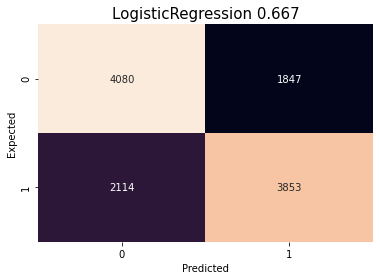

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      5927
           1       0.68      0.65      0.66      5967

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



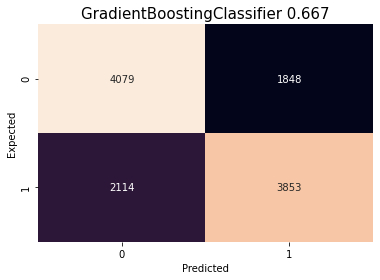

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      5927
           1       0.68      0.65      0.66      5967

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



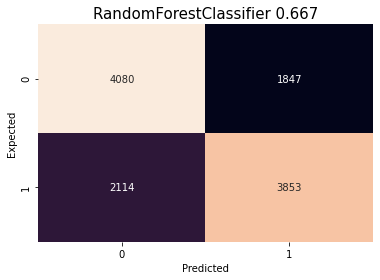

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      5927
           1       0.68      0.65      0.66      5967

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



In [115]:
#loop through the classifiers
for name, clf_gb in zip(names, classifiers):
    fit_predict_score(name,clf_gb)

In [102]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [103]:
from sklearn.svm import SVC

In [107]:
clf_gb1 = GradientBoostingClassifier()
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    #"max_depth":[3,5,8],
    "max_features":["auto"],
    #"criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100]
}

cv_clf_gb1 = GridSearchCV(clf_gb1, parameters, cv= 5, verbose=True)
cv_clf_gb1.fit(pop_X_train, pop_y_train)

print(cv_clf_gb1)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed: 58.7min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'loss': ['deviance'], 'max_features': ['auto'],
                         'n_estimators': [100],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
             verbose=True)


In [154]:
clf_gb1_new = GradientBoostingClassifier()

# Support Vector Regression

In [ ]:
#X_train, X_test, y_train, y_test is our data

In [11]:
from sklearn.svm import SVR

In [12]:
SVRM1 = SVR(kernel='linear', random_state="84")

In [ ]:
SVRM1.fit(X_train, y_train)

In [ ]:
Result1 = reg.predict(X_test)

In [ ]:
r2_score(y_test, Result1)

In [ ]:
import math
Result1Error = mean_squared_error(y_test, Result1)
math.sqrt(Result1Error)

In [ ]:
SVRM2 = SVR(kernel='poly', random_state="84")

In [ ]:
SVRM2.fit(x_train, y_train)

In [ ]:
Result2 = reg.predict(X_test)

In [ ]:
Result2Error = mean_squared_error(y_test, Result2)
math.sqrt(Result2Error)

In [ ]:
r2_score(y_test, Result2)

In [ ]:
SVRM3 = SVR(Kernal="rbf")

In [ ]:
SVRM3.fit(X_train, y_train)

In [ ]:
Result3 = reg.predict(X_test)

In [ ]:
r2_score(y_test, Result3)

In [ ]:
Result3Error = mean_squared_error(y_test, Result3)
math.sqrt(Result3Error)


<b> Now that we've had a view of the performance of different kernel methods let's running a Kernel PCA. And transforming our data.
Why? Well we have lot of dimensions and we could reduce them down. </b>

In [ ]:
kpca = KernelPCA(n_components=100, kernel='rbf', n_jobs=-1, remove_zero_eig=True)

In [ ]:
kpca.fit(X_train)

In [ ]:
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [ ]:
SV = SVR(kernel='rbf')

In [ ]:
SV.fit(X_train_kpca, y_train)

In [ ]:
SVT = SV.predict(X_train_kpca)

In [ ]:
SVV = SV.predict(X_test_kpca)

In [ ]:
r2_score(y_train, SVT)

In [ ]:
E_SVT = mean_squared_error(y_train, SVT)
math.sqrt(E_SVT)

In [ ]:
r2_score(y_test, SVV)

In [ ]:
E_SVV = mean_squared_error(y_test, SVV)
math.sqrt(E_SVV)

Time to find the best gamma and C parameters. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C = [0.001, 0.01, 1, 10, 100, 1000]

param_grid = dict(gamma=gamma, C=C)
grid = GridSearchCV(estimator=SV, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_kpca, pop_y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

## Experiment Results

From the PCA and Linear Regression experiments, we can see that variable groups such as key word variables, self reference variables, and data channel variables are some of the most important variables when it comes to predicting the number of shares an article will get. Preliminary results reveal that LASSO may be our best method among regression models.

## Research Questions

So far, we've attempted to answer our question about which variables groups are the most predictive of the number of shares an article will get. Going forward we'll try to answer the question of what aspects of an article make it popular vs unpopular.

## Next Steps

For our next steps, we will experiment more with LASSO to take advantage of the dimensionality reduction that the model provides. We'll also build classification models such as RandomForest and SVM and run them on the classification version of the data set that we created. Also we'll choose a random state for our data splits and stratify our K folds.

## Contributions

Eric Holmes cleaned the data and ran PCA and Linear Regression models. 

Kevin Calloway provided LASSO code and edited written materials.

Ryan Hossa provided cross validation code and edited written materials.